In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

In [3]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
  training_sentences.append(s.numpy().decode('utf8'))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(s.numpy().decode('utf8'))
  testing_labels.append(l.numpy())
  
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)


In [4]:
vocab_size = 1000
embedding_dim = 16
max_length = 16
trunc_type='post'
padding_type = 'post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,  maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [5]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[3]))
print(training_sentences[3])

this is the kind of film for a <OOV> <OOV> <OOV> when the rest of the
This is the kind of film for a snowy Sunday afternoon when the rest of the world can go ahead with its own business as you descend into a big arm-chair and mellow for a couple of hours. Wonderful performances from Cher and Nicolas Cage (as always) gently row the plot along. There are no rapids to cross, no dangerous waters, just a warm and witty paddle through New York life at its best. A family film in every sense and one that deserves the praise it received.


In [6]:
print(padded[0])
print(sequences[0])
print(training_sentences[0])

[ 12  14  33 425 392  18  90  28   1   9  32   1   1  40 486   1]
[12, 14, 33, 425, 392, 18, 90, 28, 1, 9, 32, 1, 1, 40, 486, 1, 197, 24, 85, 154, 19, 12, 213, 329, 28, 66, 247, 215, 9, 477, 58, 66, 85, 114, 98, 22, 1, 12, 1, 643, 767, 12, 18, 7, 33, 400, 1, 176, 1, 416, 2, 89, 1, 137, 69, 146, 52, 2, 1, 1, 69, 229, 66, 1, 16, 1, 1, 1, 1, 1, 1, 3, 39, 1, 117, 1, 17, 1, 14, 162, 19, 4, 1, 917, 1, 9, 4, 18, 13, 14, 1, 5, 99, 145, 1, 11, 242, 683, 13, 48, 24, 100, 38, 12, 1, 1, 38, 1, 1, 50, 401, 11, 98, 1, 867, 141, 10]
This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair wit

In [7]:
print(training_labels_final[3])

1


**Model 1 Bidirectionals LSTM**

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 16, 16)            16000     
_________________________________________________________________
bidirectional (Bidirectional (None, 16, 128)           41472     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 102,913
Trainable params: 102,913
Non-trainable params: 0
_________________________________________________________________


In [10]:
num_epochs = 20
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/20
782/782 [==============================] - 26s 33ms/step - loss: 0.6244 - accuracy: 0.6372 - val_loss: 0.5958 - val_accuracy: 0.6701
Epoch 2/20
782/782 [==============================] - 25s 32ms/step - loss: 0.5823 - accuracy: 0.6855 - val_loss: 0.5882 - val_accuracy: 0.6726
Epoch 3/20
782/782 [==============================] - 25s 32ms/step - loss: 0.5694 - accuracy: 0.6929 - val_loss: 0.5857 - val_accuracy: 0.6719
Epoch 4/20
782/782 [==============================] - 25s 32ms/step - loss: 0.5562 - accuracy: 0.7002 - val_loss: 0.5986 - val_accuracy: 0.6642
Epoch 5/20
782/782 [==============================] - 25s 32ms/step - loss: 0.5440 - accuracy: 0.7098 - val_loss: 0.5930 - val_accuracy: 0.6666
Epoch 6/20
782/782 [==============================] - 25s 32ms/step - loss: 0.5327 - accuracy: 0.7176 - val_loss: 0.6070 - val_accuracy: 0.6631
Epoch 7/20
782/782 [==============================] - 25s 32ms/step - loss: 0.5240 - accuracy: 0.7229 - val_loss: 0.6080 - val_accuracy:

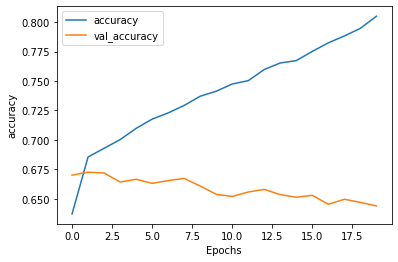

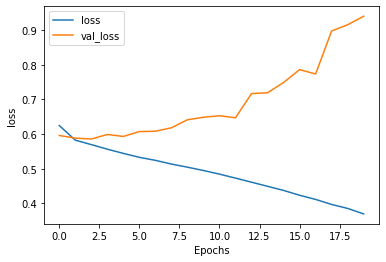

In [11]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

**Model 2 GRU single layer**

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 16, 16)            16000     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                9600      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 25,997
Trainable params: 25,997
Non-trainable params: 0
_________________________________________________________________


In [13]:
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/50
782/782 [==============================] - 11s 13ms/step - loss: 0.6368 - accuracy: 0.6217 - val_loss: 0.5955 - val_accuracy: 0.6671
Epoch 2/50
782/782 [==============================] - 10s 13ms/step - loss: 0.5790 - accuracy: 0.6860 - val_loss: 0.5855 - val_accuracy: 0.6726
Epoch 3/50
782/782 [==============================] - 10s 13ms/step - loss: 0.5648 - accuracy: 0.6954 - val_loss: 0.5884 - val_accuracy: 0.6661
Epoch 4/50
782/782 [==============================] - 10s 13ms/step - loss: 0.5529 - accuracy: 0.7039 - val_loss: 0.5888 - val_accuracy: 0.6711
Epoch 5/50
782/782 [==============================] - 10s 13ms/step - loss: 0.5402 - accuracy: 0.7125 - val_loss: 0.5988 - val_accuracy: 0.6623
Epoch 6/50
782/782 [==============================] - 10s 13ms/step - loss: 0.5261 - accuracy: 0.7221 - val_loss: 0.6073 - val_accuracy: 0.6702
Epoch 7/50
782/782 [==============================] - 10s 13ms/step - loss: 0.5113 - accuracy: 0.7323 - val_loss: 0.6203 - val_accuracy:

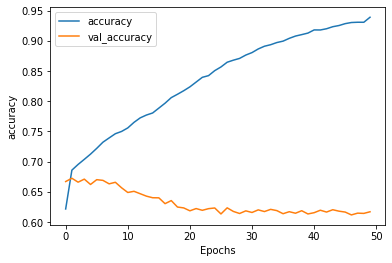

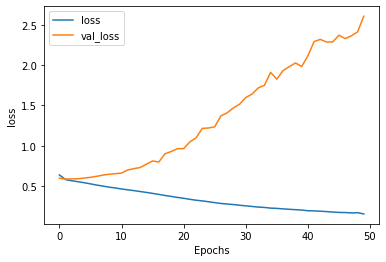

In [14]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [15]:
model.save('imdb.h5')

In [16]:
import os
print(str(os.path.getsize('./imdb.h5')/1000000) + 'MB')

0.366888MB


**Model Hybrid** 

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 16, 16)            16000     
_________________________________________________________________
conv1d (Conv1D)              (None, 12, 64)            5184      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 3, 64)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 54,273
Trainable params: 54,273
Non-trainable params: 0
_________________________________________________________________


In [18]:
num_epochs = 10
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 5s 6ms/step - loss: 0.6266 - accuracy: 0.6312 - val_loss: 0.5912 - val_accuracy: 0.6686
Epoch 2/10
782/782 [==============================] - 5s 6ms/step - loss: 0.5748 - accuracy: 0.6896 - val_loss: 0.5812 - val_accuracy: 0.6796
Epoch 3/10
782/782 [==============================] - 5s 6ms/step - loss: 0.5493 - accuracy: 0.7120 - val_loss: 0.5880 - val_accuracy: 0.6768
Epoch 4/10
782/782 [==============================] - 5s 6ms/step - loss: 0.5134 - accuracy: 0.7397 - val_loss: 0.6126 - val_accuracy: 0.6710
Epoch 5/10
782/782 [==============================] - 5s 6ms/step - loss: 0.4682 - accuracy: 0.7679 - val_loss: 0.6564 - val_accuracy: 0.6582
Epoch 6/10
782/782 [==============================] - 5s 6ms/step - loss: 0.4226 - accuracy: 0.7961 - val_loss: 0.7269 - val_accuracy: 0.6521
Epoch 7/10
782/782 [==============================] - 5s 6ms/step - loss: 0.3760 - accuracy: 0.8255 - val_loss: 0.7462 - val_accuracy: 0.6473
Epoch 

In [19]:
model.save('imdb_2.h5')

In [20]:
import os
print(str(os.path.getsize('./imdb_2.h5')/1000000) + 'MB')

0.692872MB


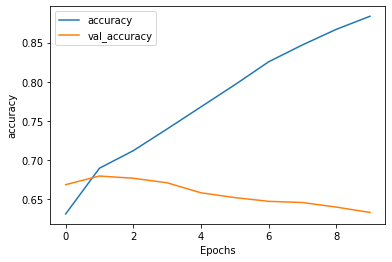

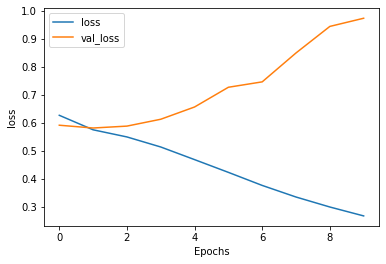

In [21]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

**Model Hybrid**

In [22]:
embedding_dim = 100
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index
vocab_size=len(word_index)

sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,  maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [23]:
vocab_size

88582

In [24]:
# Note this is the 100 dimension version of GloVe from Stanford
# I unzipped and hosted it on my site to make this notebook easier
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt \
    -O /tmp/glove.6B.100d.txt
embeddings_index = {};
with open('/tmp/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

embeddings_matrix = np.zeros((vocab_size+1, embedding_dim));
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

--2020-08-09 17:07:41--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.194.128, 209.85.145.128, 172.217.212.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 347116733 (331M) [text/plain]
Saving to: ‘/tmp/glove.6B.100d.txt’

/tmp/glove.6B.100d. 100%[===================>] 331.04M   104MB/s    in 3.2s    

2020-08-09 17:07:44 (104 MB/s) - ‘/tmp/glove.6B.100d.txt’ saved [347116733/347116733]



In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 100)          8858300   
_________________________________________________________________
dropout (Dropout)            (None, 120, 100)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 116, 64)           32064     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 29, 64)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 8,923,453
Trainable params: 65,153
Non-trainable params: 8,858,300
_______________________________________

In [26]:
num_epochs = 30
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/30
782/782 [==============================] - 39s 49ms/step - loss: 0.5562 - accuracy: 0.7065 - val_loss: 0.4498 - val_accuracy: 0.7879
Epoch 2/30
782/782 [==============================] - 39s 49ms/step - loss: 0.4484 - accuracy: 0.7884 - val_loss: 0.4367 - val_accuracy: 0.7920
Epoch 3/30
782/782 [==============================] - 39s 49ms/step - loss: 0.4151 - accuracy: 0.8091 - val_loss: 0.3897 - val_accuracy: 0.8204
Epoch 4/30
782/782 [==============================] - 39s 49ms/step - loss: 0.3868 - accuracy: 0.8244 - val_loss: 0.3803 - val_accuracy: 0.8263
Epoch 5/30
782/782 [==============================] - 39s 49ms/step - loss: 0.3698 - accuracy: 0.8323 - val_loss: 0.4069 - val_accuracy: 0.8073
Epoch 6/30
782/782 [==============================] - 39s 50ms/step - loss: 0.3497 - accuracy: 0.8440 - val_loss: 0.3754 - val_accuracy: 0.8325
Epoch 7/30
782/782 [==============================] - 39s 50ms/step - loss: 0.3364 - accuracy: 0.8508 - val_loss: 0.3825 - val_accuracy:

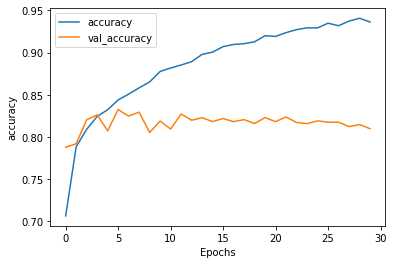

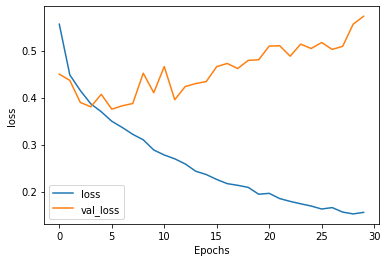

In [27]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [28]:
model.save('imdb_3.h5')

In [30]:
import os
print(str(os.path.getsize('./imdb_3.h5')/1000000) + 'MB')

36.255184MB
